In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

## Conhecendo os dados

In [3]:


df = pd.read_csv('data/Mall_Customers.csv', names=["id", "genero", "idade", "receita", 'score'],  skiprows=[0])

In [4]:
df.head()

,id,genero,idade,receita,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.count()

id         200
genero     200
idade      200
receita    200
score      200
dtype: int64

<AxesSubplot:xlabel='score', ylabel='idade'>

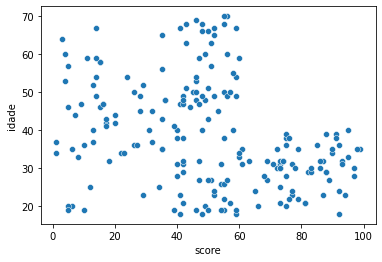

In [6]:
sns.scatterplot(data=df, x="score", y="idade")

talvez um gráfico 3d

In [7]:

dk = df[["score", "idade"]]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dk)
    distortions.append(kmeanModel.inertia_)

In [8]:
distortions

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.24505228461,
 19492.611301496087,
 15514.193134351033,
 13055.626865965582,
 11453.718049229356]

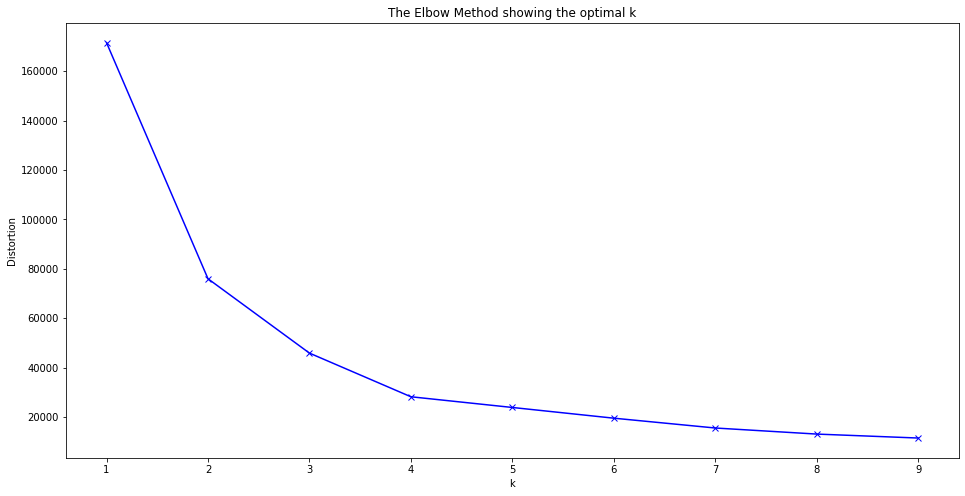

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(dk)

KMeans(n_clusters=4)

In [11]:
df['perfil'] = kmeanModel.predict(dk)


In [12]:
df.head()

,id,genero,idade,receita,score,perfil
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


<AxesSubplot:xlabel='score', ylabel='idade'>

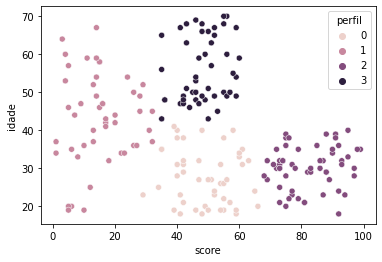

In [13]:
sns.scatterplot(data=df, x="score", y="idade", hue="perfil")


In [17]:
clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
X, y  = df[["score", "idade", "receita"]], df[["perfil"]]
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

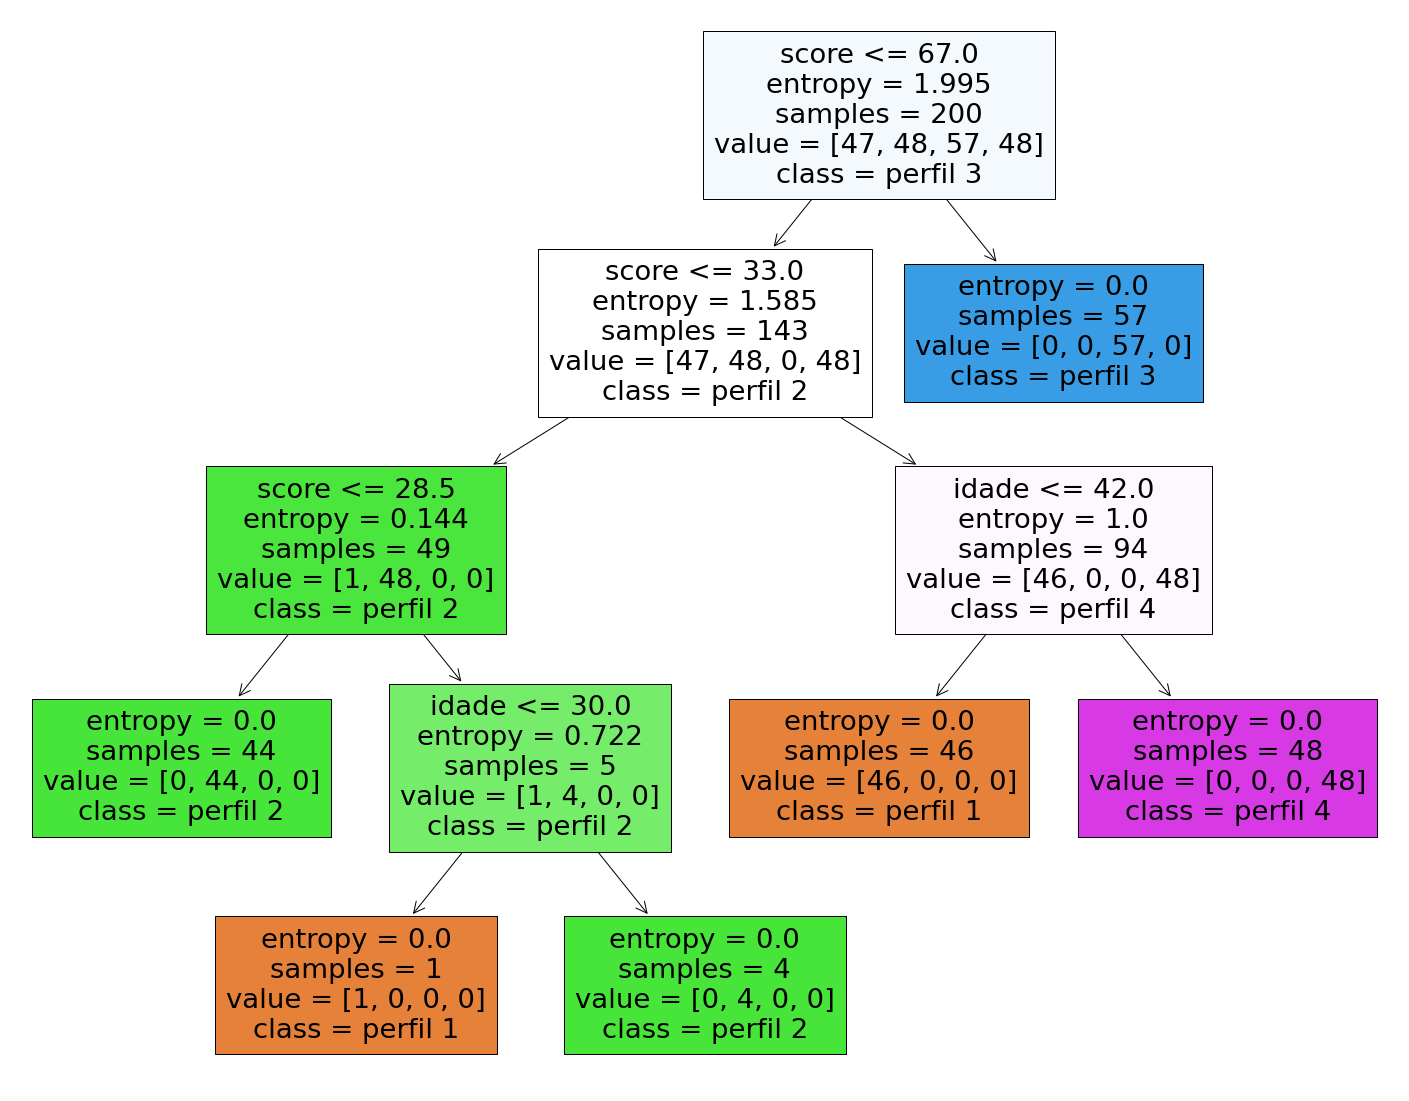

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=["score", "idade"], filled=True, class_names=["perfil 1", "perfil 2", "perfil 3", "perfil 4"])